In [48]:
from zipfile import ZipFile
import os

zip_file_path = 'women-fashion.zip'
extraction_directory = 'women fashion/'

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

['__MACOSX', 'women fashion']


In [49]:
# correcting the path to include the 'women fashion' directory and listing its
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

# list the files in the updated directory
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

(['short, blue floral dress with long puffed sleeves.jpg',
  'long, elegant, teal dress with a high slit on one side.jpg',
  'black double-breasted blazer with gold buttons, paired with a mid-length skirt.jpg',
  'fitted, off-the-shoulder white dress with horizontal ribbed texture.jpg',
  'ladies-party-wear-cotton-short-dress-full.jpg',
  'light peach, knee-length dress with off-the-shoulder sleeves.webp',
  'black floral saree.jpg',
  'anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg',
  'salwar kameez in a vibrant red color with detailed embroidery.jpg',
  'black dress with lace detailing.jpg'],
 97)

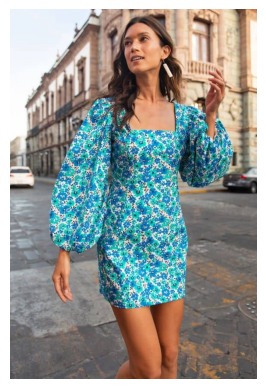

In [50]:
from PIL import Image
import matplotlib.pyplot as plt

# function to load and display an image
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# display the first image to understand its characteristics
first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[0])
display_image(first_image_path)

In [51]:
import glob

# directory path containing your images
image_directory = 'women-fashion/women fashion'

image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

# print the list of image file paths
print(image_paths_list)

['women-fashion/women fashion/short, blue floral dress with long puffed sleeves.jpg', 'women-fashion/women fashion/long, elegant, teal dress with a high slit on one side.jpg', 'women-fashion/women fashion/black double-breasted blazer with gold buttons, paired with a mid-length skirt.jpg', 'women-fashion/women fashion/fitted, off-the-shoulder white dress with horizontal ribbed texture.jpg', 'women-fashion/women fashion/ladies-party-wear-cotton-short-dress-full.jpg', 'women-fashion/women fashion/light peach, knee-length dress with off-the-shoulder sleeves.webp', 'women-fashion/women fashion/black floral saree.jpg', 'women-fashion/women fashion/anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg', 'women-fashion/women fashion/salwar kameez in a vibrant red color with detailed embroidery.jpg', 'women-fashion/women fashion/black dress with lace detailing.jpg', 'women-fashion/

In [52]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 886ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 973ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [55]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=4):
    # Preprocess the input image first
    preprocessed_img = preprocess_image(input_image_path)

    # Extract features from the preprocessed image
    input_features = extract_features(model, preprocessed_img)

    # Compute cosine similarities
    similarities = [1 - cosine(input_features, feature) for feature in all_features]

    # Get the top_n most similar indices
    top_indices = sorted(range(len(similarities)), key=lambda i: similarities[i], reverse=True)[:top_n]

    # Display the input image
    plt.figure(figsize=(15, 5))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # Display the recommended images
    for i, idx in enumerate(top_indices):
        image_path = all_image_names[idx]
        plt.subplot(1, top_n + 1, i + 2)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i + 1}")
        plt.axis('off')

    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


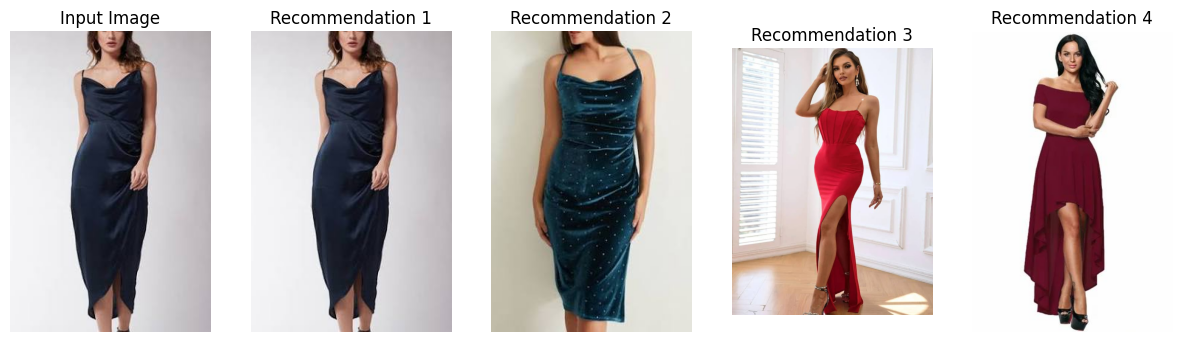

In [57]:
input_image_path = 'women-fashion/women fashion/dark, elegant, sleeveless dress that reaches down to about mid-calf.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)
